<img src="https://d24cdstip7q8pz.cloudfront.net/t/ineuron1/content/common/images/final%20logo.png" height=50% width=50% alt-text="iNeuron.ai logo">

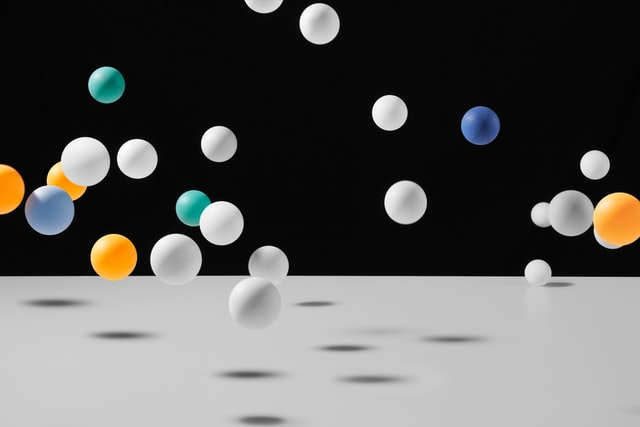<span>Photo by <a href="https://unsplash.com/@ellenqin?utm_source=unsplash&amp;utm_medium=referral&amp;utm_content=creditCopyText">Ellen Qin</a> on <a href="https://unsplash.com/@ellenqin?utm_source=unsplash&amp;utm_medium=referral&amp;utm_content=creditCopyText">Unsplash</a></span>

## Table of Content
- **<a href="#2.3">Categorical Encoding</a>**
  - **<a href="#2.3.1">Binary Categorical Encoding</a>**
    - **<a href="#2.3.1.1">Find and Replace</a>**
  - **<a href="#2.3.2">Nominal Features Encoding</a>**
    - **<a href="#2.3.2.1">One-hot-Encoding</a>**
    - **<a href="#2.3.2.2">One-hot-encoding with many categories</a>**
    - **<a href="#2.3.2.3">Dummy Encoding</a>**
  - **<a href="#2.3.3">Ordinal Encoding</a>**
    - **<a href="#2.3.3.1">Label Encoding</a>**
    - **<a href="#2.3.3.2">Target Guided Ordinal Encoding</a>**
    - **<a href="#2.3.3.3">Mean Encoding</a>**

<a id="2.3"></a>
## 2.3 Categorical Encoding
Many machine learning algorithms cannot work with categorical data directly. They require data to be numeric. Therefore, it is essential to know how to encode categorical variables.

**There are several different types of categorical data such as:**

- **Binary:** A variable that has only 2 values. Example:- Yes/No or True/False.
- **Nominal:** A variable that has no numerical importance. Example:- state name or color.
- **Ordinal:** A variable that has some order associated with it. Example:- Education or Designation

For encoding categorical data, we have a python package category_encoders. The following code helps you install easily.

```cmd
pip install category_encoders
```

<a id="2.3.1"></a>
### 2.3.1 Binary Categorical Encoding

Binary features are those with only two possible values.

<a id="2.3.1.1"></a>
#### Find and Replace
Here we pass a dictionary to `replace()` with the current value as the key and the desired value as the value.

In [1]:
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
matplotlib.style.use('ggplot')

## Generating a dataframe of school student details 
data = pd.DataFrame({
    'Name':['Sudhanshu','Ram','Jhon','Nilesh','Nita','Krish','Sudhesna'],
    'City': ['Jamshedpur','Ranchi','Dhanbad','Dhanbad','Jamshedpur','Ranchi','Bokaro'],
    'Gender': ['Male','Male','Male','Male','Female','Male','Female'],
    'Education': ['class-12','class-10','class-12','class-9','class-8','class-12','class-11'],
    'HouseColor': ['Yellow','Red','Yellow','Green','Blue','Blue','Yellow'],
    'HouseCaptain':[True,False,False,True,False,True,False]
})
## Saving data in numpy format
np.save('Datasets/student.npy',data)
data

,Name,City,Gender,Education,HouseColor,HouseCaptain
0,Sudhanshu,Jamshedpur,Male,class-12,Yellow,True
1,Ram,Ranchi,Male,class-10,Red,False
2,Jhon,Dhanbad,Male,class-12,Yellow,False
3,Nilesh,Dhanbad,Male,class-9,Green,True
4,Nita,Jamshedpur,Female,class-8,Blue,False
5,Krish,Ranchi,Male,class-12,Blue,True
6,Sudhesna,Bokaro,Female,class-11,Yellow,False


In [2]:
data['Gender'] = data['Gender'].replace({'Male':1, 'Female':0})
data['HouseCaptain'] = data['HouseCaptain'].replace({True:1, False:0})

data

,Name,City,Gender,Education,HouseColor,HouseCaptain
0,Sudhanshu,Jamshedpur,1,class-12,Yellow,1
1,Ram,Ranchi,1,class-10,Red,0
2,Jhon,Dhanbad,1,class-12,Yellow,0
3,Nilesh,Dhanbad,1,class-9,Green,1
4,Nita,Jamshedpur,0,class-8,Blue,0
5,Krish,Ranchi,1,class-12,Blue,1
6,Sudhesna,Bokaro,0,class-11,Yellow,0


<a id="2.3.2"></a>
### 2.3.2 Nominal Features Encoding

Nominal features are categorical features that have no numerical importance. Order does not matter.

<a id="2.3.2.1"></a>
#### One Hot Encoding

In [3]:
import numpy as np
import pandas as pd
import category_encoders as ce 

''' If you will get error try to replace C:\ProgramData\Anaconda3\Lib\site-packages\statsmodels\distributions\edgeworth.py
Changing the
from scipy.misc import factorial
to
from scipy.special import factorial
'''
data= np.load('Datasets/student.npy',allow_pickle=True)

data= pd.DataFrame(data,columns=['Name','City','Gender','Education','HouseColor','HouseCaptain'])

Encoder = ce.OneHotEncoder(cols=['Gender','HouseCaptain'])

#Fit and Transform Data 
data_encoded=Encoder.fit_transform(data) 
data_encoded

,Name,City,Gender_1,Gender_2,Education,HouseColor,HouseCaptain_1,HouseCaptain_2
0,Sudhanshu,Jamshedpur,1,0,class-12,Yellow,1,0
1,Ram,Ranchi,1,0,class-10,Red,0,1
2,Jhon,Dhanbad,1,0,class-12,Yellow,0,1
3,Nilesh,Dhanbad,1,0,class-9,Green,1,0
4,Nita,Jamshedpur,0,1,class-8,Blue,0,1
5,Krish,Ranchi,1,0,class-12,Blue,1,0
6,Sudhesna,Bokaro,0,1,class-11,Yellow,0,1


<a id="2.3.2.2"></a>
#### One-hot-encoding with many categories

In [4]:
## Here we will hamdle multple categories in features
Encoder = ce.OneHotEncoder(cols=['Name','City','Gender','Education','HouseColor','HouseCaptain'])

#Fit and Transform Data 
data_encoded=Encoder.fit_transform(data) 
data_encoded

,Name_1,Name_2,Name_3,Name_4,Name_5,Name_6,Name_7,City_1,City_2,City_3,...,Education_2,Education_3,Education_4,Education_5,HouseColor_1,HouseColor_2,HouseColor_3,HouseColor_4,HouseCaptain_1,HouseCaptain_2
0,1,0,0,0,0,0,0,1,0,0,...,0,0,0,0,1,0,0,0,1,0
1,0,1,0,0,0,0,0,0,1,0,...,1,0,0,0,0,1,0,0,0,1
2,0,0,1,0,0,0,0,0,0,1,...,0,0,0,0,1,0,0,0,0,1
3,0,0,0,1,0,0,0,0,0,1,...,0,1,0,0,0,0,1,0,1,0
4,0,0,0,0,1,0,0,1,0,0,...,0,0,1,0,0,0,0,1,0,1
5,0,0,0,0,0,1,0,0,1,0,...,0,0,0,0,0,0,0,1,1,0
6,0,0,0,0,0,0,1,0,0,0,...,0,0,0,1,1,0,0,0,0,1


<a id="2.3.2.3"></a>
#### Dummy Encoding
- Dummy coding scheme is similar to one-hot encoding. 
- In the case of one-hot encoding, for `k` categories in a variable, it uses k binary variables. 
- The dummy encoding is a small improvement over one-hot-encoding. Dummy encoding uses `k-1` features to represent `k` labels/categories.
- The `drop_first` parameter is helpful to get `k-1` dummies.

In [5]:
import numpy as np
import pandas as pd

data= np.load('Datasets/student.npy',allow_pickle=True)

data= pd.DataFrame(data,columns=['Name','City','Gender','Education','HouseColor','HouseCaptain'])

data_encoded = pd.get_dummies(data[['Gender','HouseCaptain']])

data_encoded

,Gender_Female,Gender_Male,HouseCaptain_False,HouseCaptain_True
0,0,1,0,1
1,0,1,1,0
2,0,1,1,0
3,0,1,0,1
4,1,0,1,0
5,0,1,0,1
6,1,0,1,0


In [6]:
data_encoded = pd.get_dummies(data[['Gender','HouseCaptain']],drop_first=True)

data_encoded

,Gender_Male,HouseCaptain_True
0,1,1
1,1,0
2,1,0
3,1,1
4,0,0
5,1,1
6,0,0


<a id="2.3.3"></a>
### 2.3.3 Ordinal Encoding

Ordinal features are categorical features that have numerical importance. Order does matter.

<a id="2.3.3.1"></a>
#### Label Encoding

This categorical data encoding technique when the categorical feature is ordinal.

In [7]:
import pandas as pd
import category_encoders as ce 

data=pd.DataFrame({'Degree':['High school','High school','Masters','None','Bachelors','Bachelors','Diploma','Masters','Phd','High school']})
#Original data
data

,Degree
0,High school
1,High school
2,Masters
3,None
4,Bachelors
5,Bachelors
6,Diploma
7,Masters
8,Phd
9,High school


In [8]:
##create object of Ordinalencoding
Encoder= ce.OrdinalEncoder(cols=['Degree'],return_df=True,mapping=[{'col':'Degree','mapping':
                                                                    {'None':0,'High school':1,'Diploma':2,
                                                                     'Bachelors':3,'Masters':4,'Phd':5}}])

#fit and transform train data 
data_encoded = Encoder.fit_transform(data)
#Encoded data
data_encoded

,Degree
0,1
1,1
2,4
3,0
4,3
5,3
6,2
7,4
8,5
9,1


<a id="2.3.3.2"></a>
#### Target Guided Ordinal Encoding
1. Ordering the labels according to the target
2. Replace the labels by the joint probability of being 1 or 0

In [9]:
import pandas as pd

data=pd.read_csv('Datasets/titanic.csv',usecols=['Cabin','Survived'])
data.head()

,Survived,Cabin
0,0,NaN
1,1,C85
2,1,NaN
3,1,C123
4,0,NaN


In [10]:
data['Cabin'].fillna('Missing',inplace=True)

In [11]:
## Considering only first letter of word
data['Cabin']=data['Cabin'].astype(str).str[0]
data.head()

,Survived,Cabin
0,0,M
1,1,C
2,1,M
3,1,C
4,0,M


In [12]:
data.groupby(['Cabin'])['Survived'].mean()

Cabin
A    0.466667
B    0.744681
C    0.593220
D    0.757576
E    0.750000
F    0.615385
G    0.500000
M    0.299854
T    0.000000
Name: Survived, dtype: float64

In [13]:
## Sorting values in ordinal labels
ordinal_labels=data.groupby(['Cabin'])['Survived'].mean().sort_values().index
ordinal_labels

Index(['T', 'M', 'A', 'G', 'C', 'F', 'B', 'E', 'D'], dtype='object', name='Cabin')

In [14]:
## Mapping value as per the order
ordinal_labels_map={k:i for i,k in enumerate(ordinal_labels,0)}
ordinal_labels_map

{'T': 0, 'M': 1, 'A': 2, 'G': 3, 'C': 4, 'F': 5, 'B': 6, 'E': 7, 'D': 8}

In [15]:
data['Cabin_ordinal_labels']=data['Cabin'].map(ordinal_labels_map)
data.head(10)

,Survived,Cabin,Cabin_ordinal_labels
0,0,M,1
1,1,C,4
2,1,M,1
3,1,C,4
4,0,M,1
5,0,M,1
6,0,E,7
7,0,M,1
8,1,M,1
9,1,M,1


<a id="2.3.3.3"></a>
#### Mean Encoding
Mean encoding represents a probability of your target variable, conditional on each value of the feature.

In [16]:
import pandas as pd

data=pd.read_csv('Datasets/titanic.csv',usecols=['Cabin','Survived'])

## Considering only first letter of word
data['Cabin']=data['Cabin'].astype(str).str[0]

mean_ordinal=data.groupby(['Cabin'])['Survived'].mean().to_dict()
mean_ordinal

{'A': 0.4666666666666667,
 'B': 0.7446808510638298,
 'C': 0.5932203389830508,
 'D': 0.7575757575757576,
 'E': 0.75,
 'F': 0.6153846153846154,
 'G': 0.5,
 'T': 0.0,
 'n': 0.29985443959243085}

In [17]:
data['mean_ordinal_encode']=data['Cabin'].map(mean_ordinal)
data.head(10)

,Survived,Cabin,mean_ordinal_encode
0,0,n,0.299854
1,1,C,0.593220
2,1,n,0.299854
3,1,C,0.593220
4,0,n,0.299854
5,0,n,0.299854
6,0,E,0.750000
7,0,n,0.299854
8,1,n,0.299854
9,1,n,0.299854
